In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("results.csv")
df = df.sort_values(by="growing_text_size")
df.head()

,algorithm,base_text,growing_text,base_text_size,growing_text_size,time,space
0,memo,a_story_of_a_little_pet_bear,gift_of_the_magi,10,10,139808,3301376
9900,memo,invention_of_a_new_religion,a_story_of_a_little_pet_bear,10,10,166791,5214208
5700,memo,gift_of_the_magi,a_story_of_a_little_pet_bear,10,10,149688,4382720
5701,dp,gift_of_the_magi,a_story_of_a_little_pet_bear,10,10,28123,4382720
5702,dpopt,gift_of_the_magi,a_story_of_a_little_pet_bear,10,10,7157,4317184


In [45]:
aggregated = df.groupby(
    ["algorithm", "base_text", "growing_text", "base_text_size", "growing_text_size"],
    as_index=False
).agg({
    "time": ["mean", "std"],
    "space": ["mean", "std"]
})

aggregated.columns = [
    "algorithm", "base_text", "growing_text", "base_text_size", "growing_text_size",
    "time_mean", "time_std", "space_mean", "space_std"
]


aggregated["text_pair"] = aggregated["base_text"] + " → " + aggregated["growing_text"]

aggregated.head()

,algorithm,base_text,growing_text,base_text_size,growing_text_size,time_mean,time_std,space_mean,space_std,text_pair
0,dp,a_story_of_a_little_pet_bear,gift_of_the_magi,10,10,29419.6,4838.246253,3445555.2,138157.296743,a_story_of_a_little_pet_bear → gift_of_the_magi
1,dp,a_story_of_a_little_pet_bear,gift_of_the_magi,10,20,30641.4,1303.207121,3445555.2,138157.296743,a_story_of_a_little_pet_bear → gift_of_the_magi
2,dp,a_story_of_a_little_pet_bear,gift_of_the_magi,10,30,50441.6,17702.938578,3446374.4,138163.368390,a_story_of_a_little_pet_bear → gift_of_the_magi
3,dp,a_story_of_a_little_pet_bear,gift_of_the_magi,10,40,60109.4,4622.089603,3446374.4,138163.368390,a_story_of_a_little_pet_bear → gift_of_the_magi
4,dp,a_story_of_a_little_pet_bear,gift_of_the_magi,10,50,93937.0,31574.220165,3446374.4,138163.368390,a_story_of_a_little_pet_bear → gift_of_the_magi


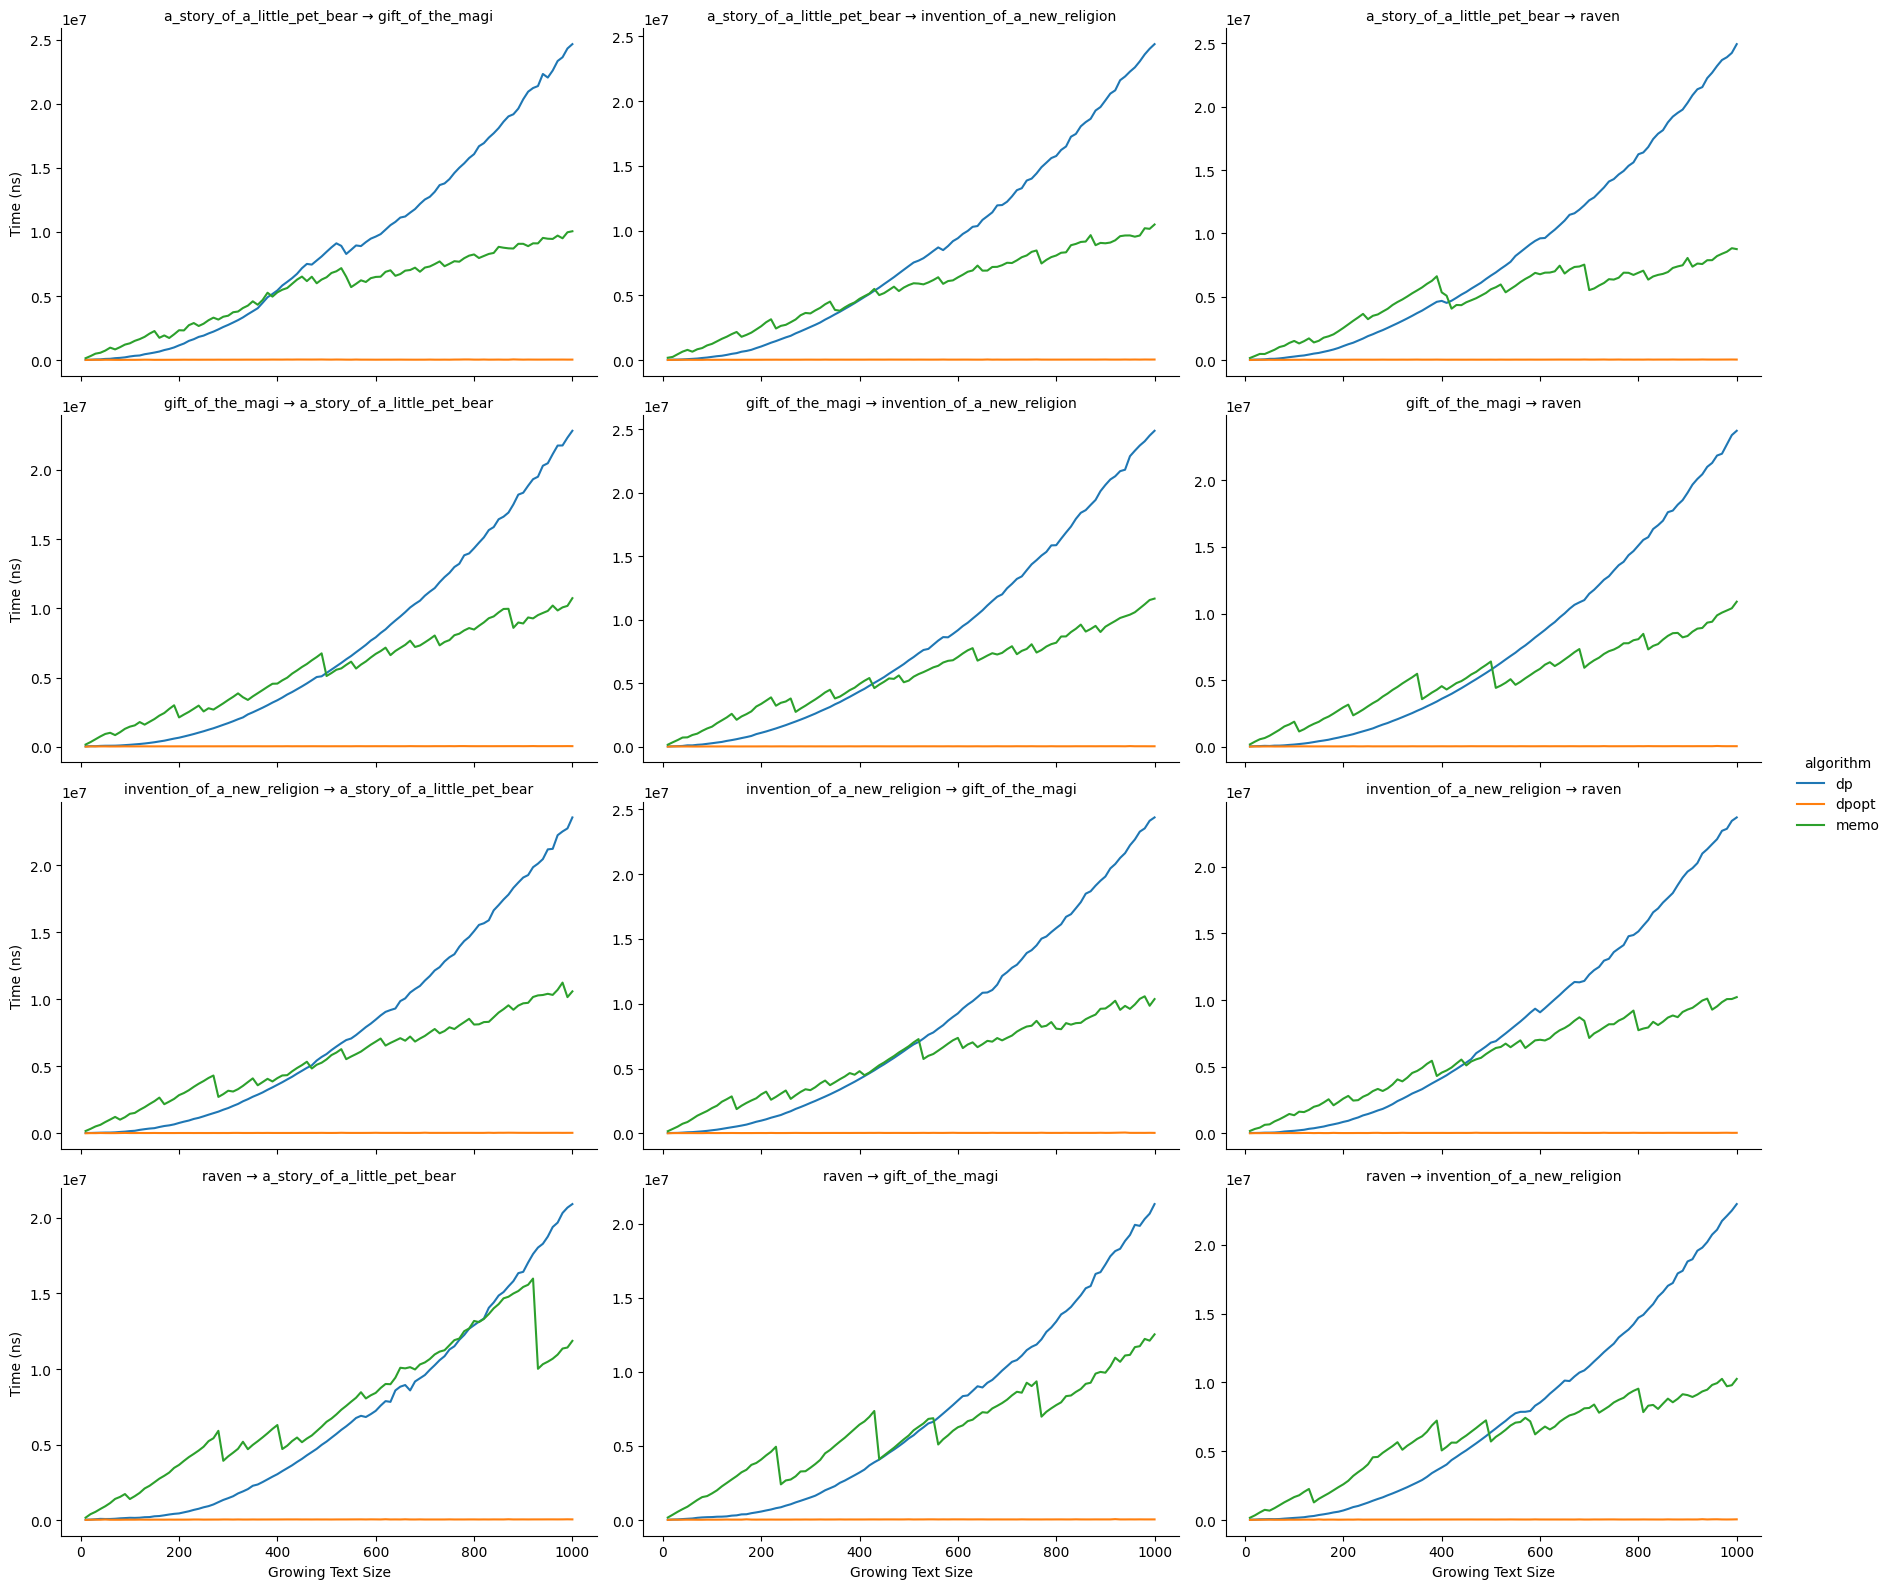

In [46]:
g = sns.FacetGrid(
    aggregated,
    col="text_pair",
    col_wrap=3,
    hue="algorithm",
    sharey=False,
    height=4,
    aspect=1.5
)
g.map_dataframe(sns.lineplot, x="growing_text_size", y="time_mean", errorbar=None).add_legend()

g.set_axis_labels("Growing Text Size", "Time (ns)")
g.set_titles(col_template="{col_name}")
g.tight_layout()

plt.savefig("plot_time.pdf", format="pdf", bbox_inches="tight")
plt.show()

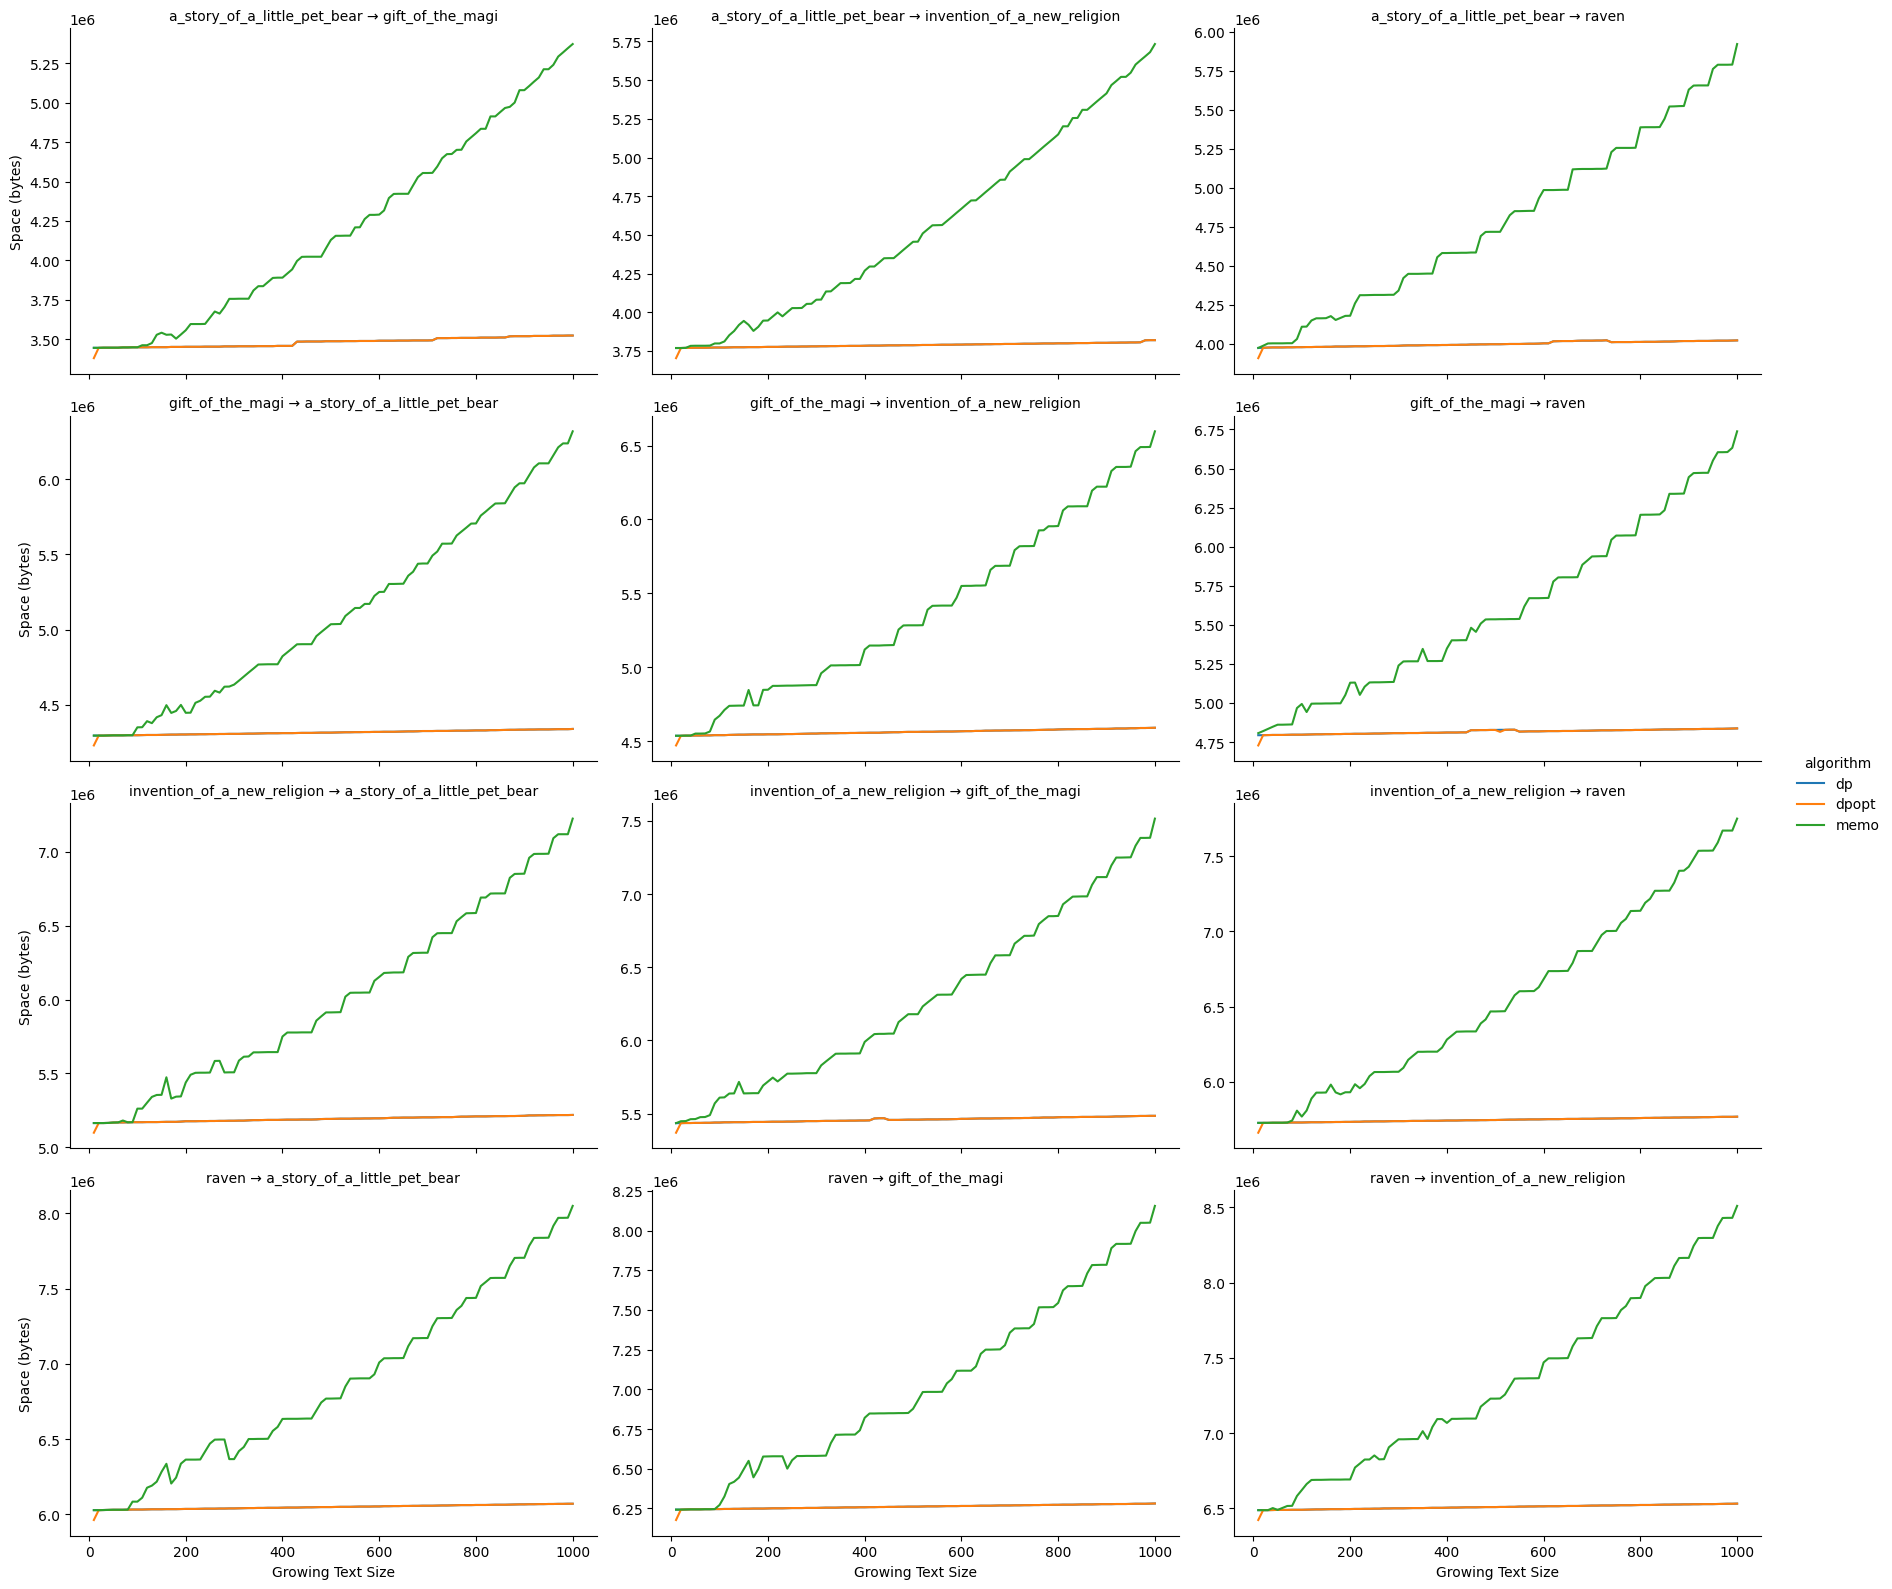

In [47]:
g = sns.FacetGrid(
    aggregated,
    col="text_pair",
    col_wrap=3,
    hue="algorithm",
    sharey=False,
    height=4,
    aspect=1.5
)
g.map_dataframe(sns.lineplot, x="growing_text_size", y="space_mean", errorbar=None).add_legend()

g.set_axis_labels("Growing Text Size", "Space (bytes)")
g.set_titles(col_template="{col_name}")
g.tight_layout()

plt.savefig("plot_space.pdf", format="pdf", bbox_inches="tight")
plt.show()

# No memo

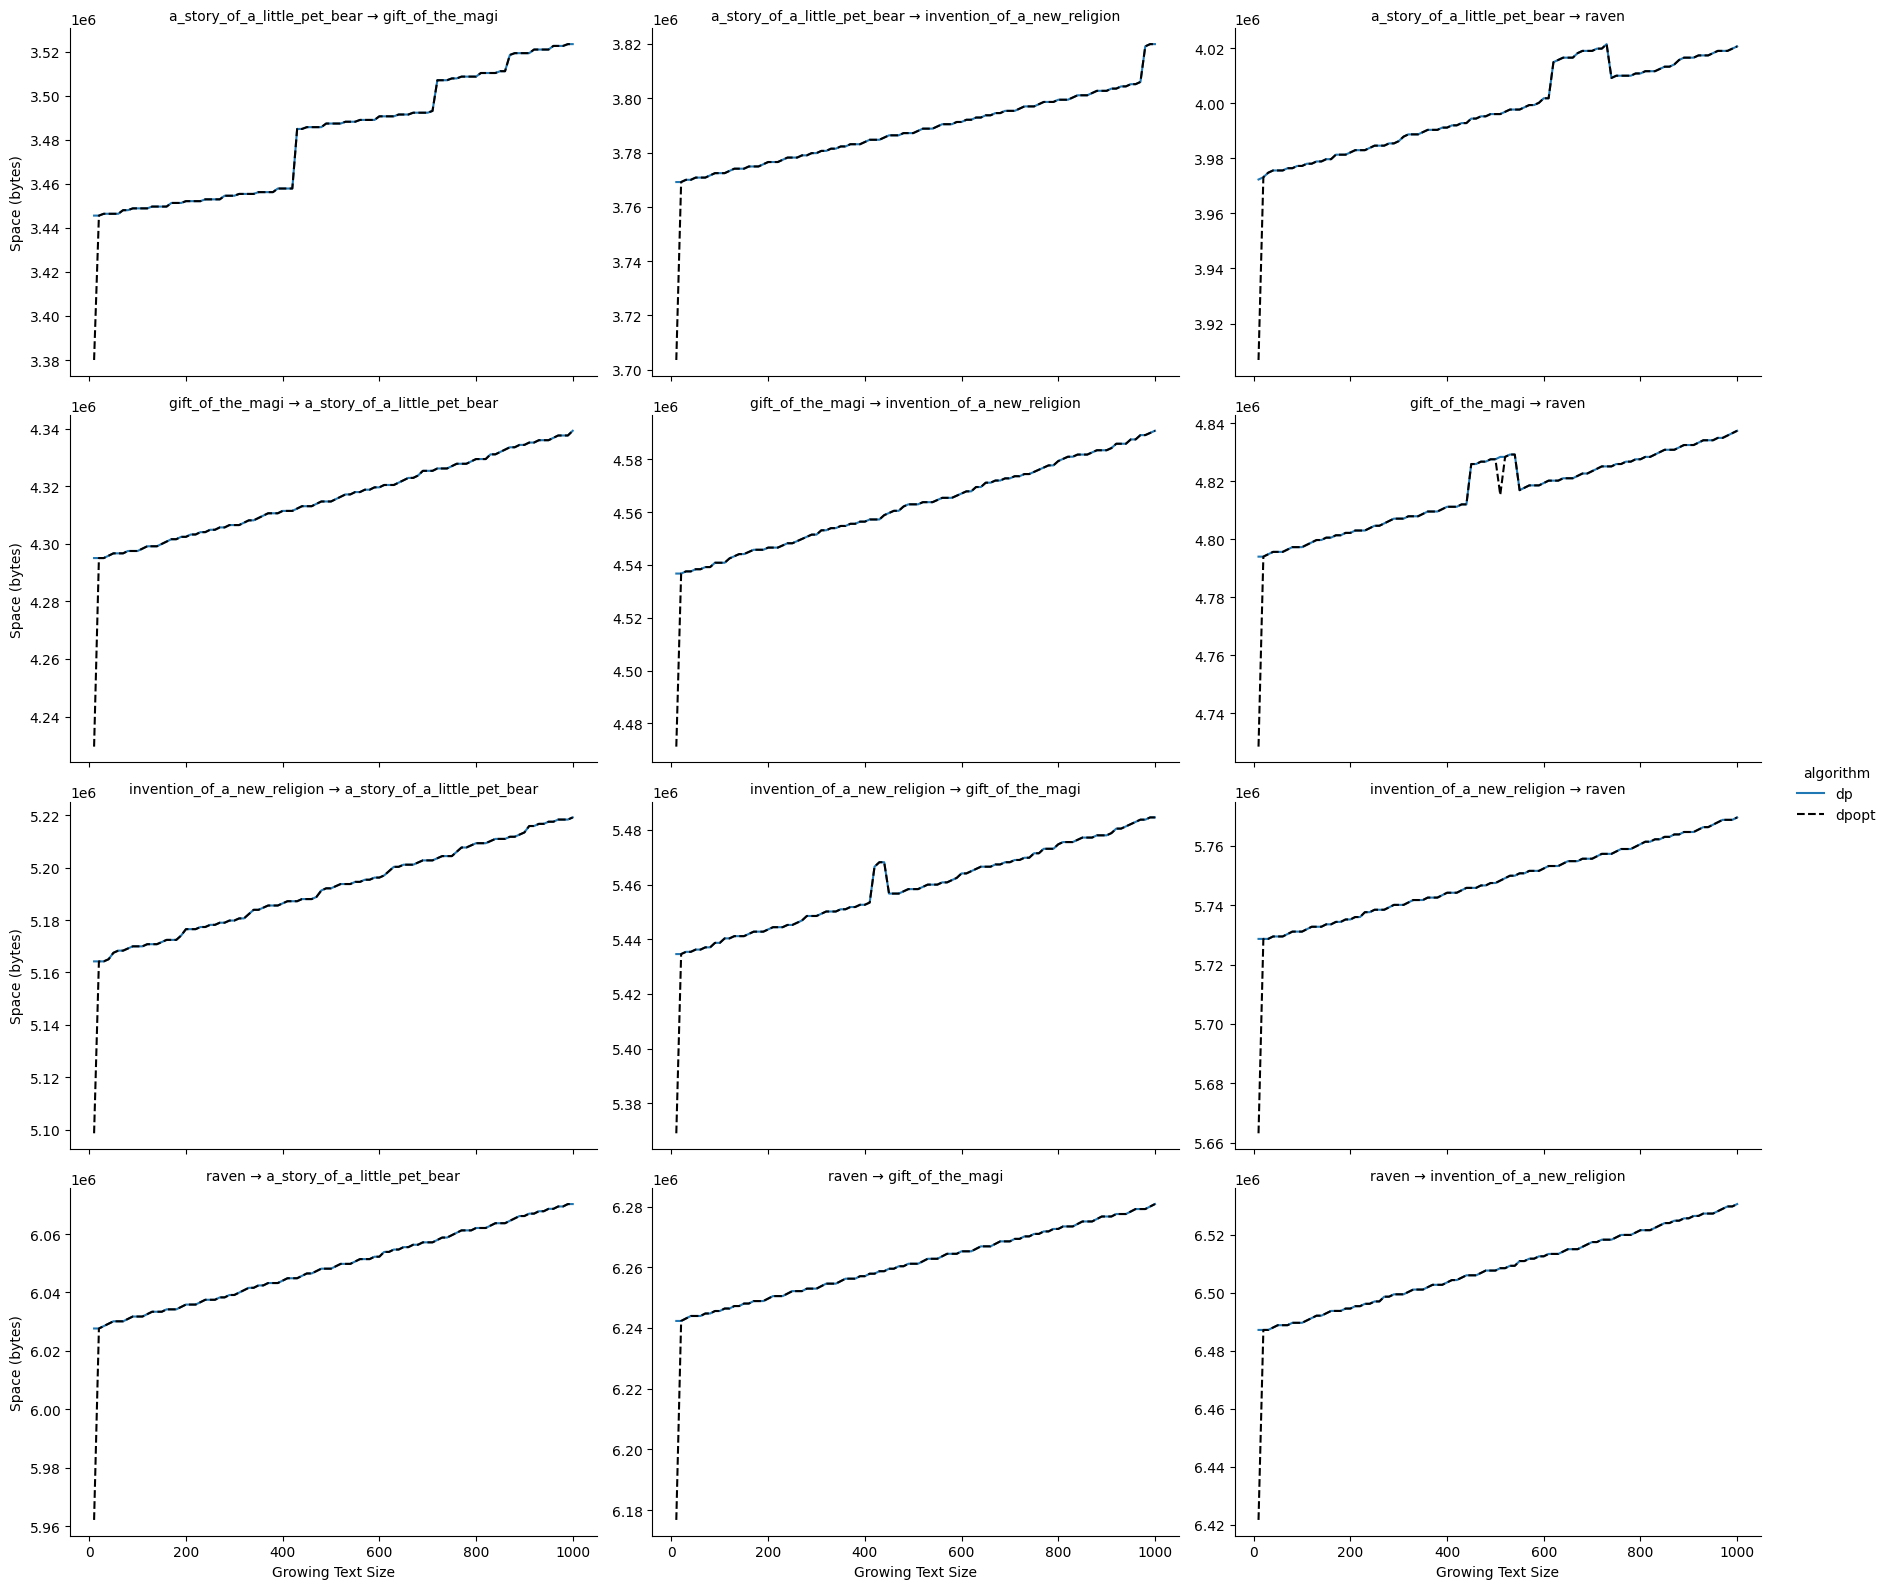

In [57]:
aggregated_no_memo = aggregated[aggregated["algorithm"] != "memo"]


d = {'color': ['C0', 'k'], "ls" : ["-","--"]}

g = sns.FacetGrid(
    aggregated_no_memo,
    col="text_pair",
    col_wrap=3,
    hue="algorithm",
    sharey=False,
    height=4,
    aspect=1.5,
    hue_kws=d
)
g.map_dataframe(sns.lineplot, x="growing_text_size", y="space_mean", errorbar=None).add_legend()

g.set_axis_labels("Growing Text Size", "Space (bytes)")
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.savefig("plot_space.pdf", format="pdf", bbox_inches="tight")
plt.show()

